In [112]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Polinomios de Chebyshev

## De primer tipo

1. $T_{0}(x) = 1$
2. $T_{1}(x) = x$
3. $T_{n+1}(x) = 2xT_{n}(x) - T_{n-1}(x)$

## De segundo tipo
1. $U_{0}(x) = 1$
2. $U_{1}(x) = 2x$
3. $U_{n+1}(x) = 2xU_{n}(x) - U_{n-1}(x)$

In [2]:
x = sp.Symbol('x')

In [3]:
t0 = 1
t1 = x

In [35]:
t1.args

()

In [26]:
t2 = 2*x*t1 - t0

In [43]:
t2.args

(-1, 2*x**2)

In [19]:
t3 = 2*x*t2 - t1

In [44]:
t3.args

(-x, 2*x*(2*x**2 - 1))

In [29]:
t4 = 2*x*t3 - t2

In [49]:
t4.args[2].args[2].args

(-x, 2*x*(2*x**2 - 1))

* t0 = 1
* t1 = 1
* t2 = 1 + 1 + 2 = 4
* t3 = 1 + 2 + t2 = 7
* t4 = 1 + 1 + 2 + 2 + t3 = 13

* t50 = ?

In [22]:
def cheybshev_tipouno(n=2):
  polinomios = [1, x]

  for i in range(2, n+1):
    thispoly = 2*x*polinomios[i-1] - polinomios[i-2]
    polinomios.append(thispoly.expand())
  
  return polinomios

In [107]:
poly_tipouno = cheybshev_tipouno(50)

In [109]:
len(poly_tipouno)

51

In [110]:
poly_tipouno[50]

562949953421312*x**50 - 7036874417766400*x**48 + 41341637204377600*x**46 - 151732604633088000*x**44 + 390051749953536000*x**42 - 746299014911098880*x**40 + 1102487181118668800*x**38 - 1287455960675123200*x**36 + 1206989963132928000*x**34 - 917508630511616000*x**32 + 568855350917201920*x**30 - 288405684905574400*x**28 + 119536566770073600*x**26 - 40383975260160000*x**24 + 11057517035520000*x**22 - 2432653747814400*x**20 + 424820047872000*x**18 - 57930006528000*x**16 + 6034375680000*x**14 - 466152960000*x**12 + 25638412800*x**10 - 947232000*x**8 + 21528000*x**6 - 260000*x**4 + 1250*x**2 - 1

## Gráficas

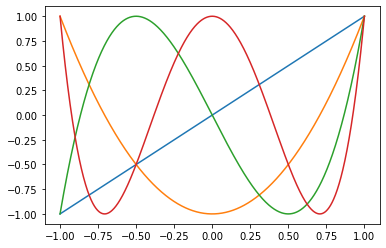

In [130]:
xs = np.linspace(-1, 1, num=1000)
for i in range(1,5):
  lambda_tn = sp.lambdify(x, poly_tipouno[i], 'numpy')
  ys = lambda_tn(xs)
  
  plt.plot(xs, ys)

In [117]:
def cheybshev_tipodos(n=2):
  polinomios = [1, 2*x]

  for i in range(2, n+1):
    thispoly = 2*x*polinomios[i-1] - polinomios[i-2]
    polinomios.append(thispoly.expand())
  
  return polinomios

In [118]:
poly_tipodos = cheybshev_tipodos(50)

In [119]:
poly_tipodos[50]

1125899906842624*x**50 - 13792273858822144*x**48 + 79375943432404992*x**46 - 285257296710205440*x**44 + 717695219914506240*x**42 - 1343338226839977984*x**40 + 1940377438768857088*x**38 - 2214424252361211904*x**36 + 2027743138063319040*x**34 - 1504714154039050240*x**32 + 910168561467523072*x**30 - 449912868452696064*x**28 + 181695581490511872*x**26 - 59768283385036800*x**24 + 15922824531148800*x**22 - 3405715246940160*x**20 + 577755265105920*x**18 - 76467608616960*x**16 + 7724000870400*x**14 - 578029670400*x**12 + 30766095360*x**10 - 1098789120*x**8 + 24111360*x**6 - 280800*x**4 + 1300*x**2 - 1

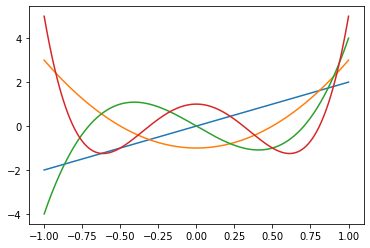

In [131]:
xs = np.linspace(-1, 1, num=1000)
for i in range(1,5):
  lambda_tn = sp.lambdify(x, poly_tipodos[i], 'numpy')
  ys = lambda_tn(xs)
  
  plt.plot(xs, ys)

# Matrices de Hadamard

In [53]:
h1 = sp.Matrix([[1]])

In [54]:
h1

Matrix([[1]])

In [55]:
h2 = sp.Matrix([[1,1],[1,-1]])

In [56]:
h2

Matrix([
[1,  1],
[1, -1]])

In [57]:
h2 = sp.Matrix([[h1, h1],[h1, -h1]])

In [58]:
h2

Matrix([
[1,  1],
[1, -1]])

In [59]:
h4 = sp.Matrix([[h2, h2],[h2, -h2]])

In [60]:
h4

Matrix([
[1,  1,  1,  1],
[1, -1,  1, -1],
[1,  1, -1, -1],
[1, -1, -1,  1]])

In [61]:
def hadamard(k):
  # Genera las matrices de Hadamard hasta de tamaño 2**k
  hadamard = [sp.Matrix([[1]])]

  for i in range(1,k+1):
    hadamard.append(sp.Matrix([[hadamard[i-1], hadamard[i-1]],[hadamard[i-1], -hadamard[i-1]]]))
  
  return hadamard

In [63]:
mat = hadamard(6)

In [64]:
len(mat)

7

In [69]:
mat[4]

Matrix([
[1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
[1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
[1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1],
[1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1],
[1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1],
[1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1],
[1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1],
[1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1],
[1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
[1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1],
[1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1],
[1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1],
[1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
[1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1],
[1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1],
[1, -1, -1,  1, 

# Series Taylor

In [70]:
f = sp.Function("f")(x)

In [71]:
sp.series(f, x)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + x**5*Subs(Derivative(f(xi), (xi, 5)), xi, 0)/120 + O(x**6)

In [74]:
sp.cos(x).series(n=20)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 - x**10/3628800 + x**12/479001600 - x**14/87178291200 + x**16/20922789888000 - x**18/6402373705728000 + O(x**20)

In [75]:
sp.sin(x).series(n=20)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 - x**11/39916800 + x**13/6227020800 - x**15/1307674368000 + x**17/355687428096000 - x**19/121645100408832000 + O(x**20)

# Polinomios de Legendre

* $P_{0}(x) = 1$
* $P_{1}(x) = x$
* $P_{n+1}(x) = \frac{(2n+1)xP_n(x) - nP_{n-1}(x)}{n+1}$

In [80]:
def legendre(n=2):
  polinomios = [1, x]

  for i in range(2, n+1):
    thispoly = ((2*i-1)*x*polinomios[i-1] - (i-1)*polinomios[i-2])/(i)
    polinomios.append(thispoly.expand())
  
  return polinomios

In [81]:
poly_legendre = legendre(50)

In [82]:
poly_legendre[50]

12611418068195524166851562157*x**50/140737488355328 - 156050375086257748529223875175*x**48/140737488355328 + 226836112238787036521861509275*x**46/35184372088832 - 823773249709279237895181270525*x**44/35184372088832 + 4189728463575151392735706892025*x**42/70368744177664 - 7928255400303748020099876118755*x**40/70368744177664 + 5790298887862287879848224131675*x**38/35184372088832 - 6684039602901787158511168414725*x**36/35184372088832 + 24770264410753681822717859419275*x**34/140737488355328 - 18602568051449552212241926551825*x**32/140737488355328 + 1423900270604780539702468452115*x**30/17592186044416 - 712769410486857922635873160725*x**28/17592186044416 + 583174972216520118520259858775*x**26/35184372088832 - 194391657405506706173419952925*x**24/35184372088832 + 26248579962778792027330678575*x**22/17592186044416 - 5693353963757653481984400705*x**20/17592186044416 + 7838675747202566388239392275*x**18/140737488355328 - 1052956443654076082002306425*x**16/140737488355328 + 269988831706173354359

In [84]:
poly_legendre[6]

231*x**6/16 - 315*x**4/16 + 105*x**2/16 - 5/16

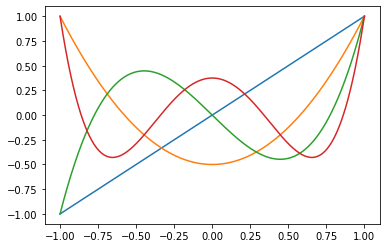

In [132]:
xs = np.linspace(-1, 1, num=1000)
for i in range(1,5):
  lambda_tn = sp.lambdify(x, poly_legendre[i], 'numpy')
  ys = lambda_tn(xs)
  
  plt.plot(xs, ys)

# Diferencias finitas  y extrapolación

* $f^{\prime}(x) \approx \frac{f(x+h) - f(x-h)}{2h} = F(h)$
* $Q \approx \frac{2^n F(h/2) - F(h)}{2^{n}-1}$

In [92]:
f = sp.Function('f')

In [85]:
h = sp.Symbol('h')

In [101]:
F1 = 1/(2*h) * (f(x+h) -  f(x-h))

In [102]:
F1

(-f(-h + x) + f(h + x))/(2*h)

In [103]:
F2 = (4*F.subs(h,h/2) - F)/(3)

In [104]:
F2.simplify()

(f(-h + x) - 8*f(-h/2 + x) + 8*f(h/2 + x) - f(h + x))/(6*h)

In [105]:
F3 = (16*F2.subs(h,h/2) - F2)/(15)

In [106]:
F3.simplify()

(-f(-h + x) + 40*f(-h/2 + x) - 256*f(-h/4 + x) + 256*f(h/4 + x) - 40*f(h/2 + x) + f(h + x))/(90*h)